# CMSE 802 Pre-class assignment: Fast Fourier Transform (FFT) Part 2
## Date: 10/24/2018
## Due: 10/24/2018; 10:30 PM

### The goal of this assignment is to learn about 2D Fast Fourier Transform.

---
### Your name: Boyao Zhu

---
### Two-dimensional FFT

In the previous class we converted a 1D time signal into it's frequency space.  In this lesson we will look at what it means to look at 2D data in the 2D frequency space. 

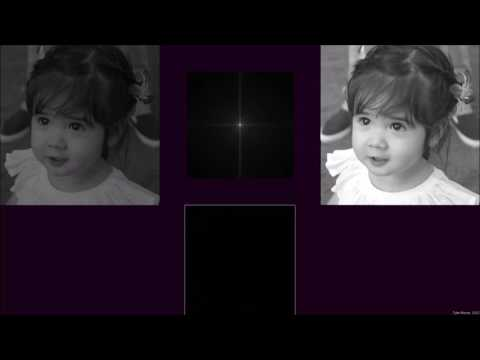

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("js4bLBYtJwY",width=640,height=360)

**Question 1:** In the video, please describe in your own works what is "k-space."

**Your answer: ** k space is filled by performing fourier transform on the sause image

---
** Now, let's write some code to practice 2D FFT as in the vidoe. **

** A. Read in image. Go to the link below. Investigate how to read image to an array using Python. The image file in this assignment is "brick_texture3420.jpg". Find the size (shape) of the array. Imshow the image. You can google imread( ) and imshow( ) functions. **

https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.misc.imread.html

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


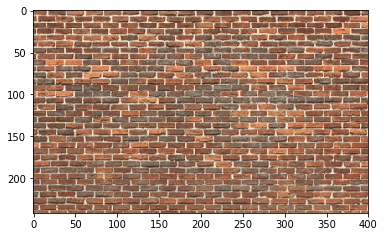

(242, 400, 3)

In [20]:
# Your code:
from scipy import misc
brick=misc.imread('brick_texture3420.jpg')
type(brick)
#print (brick)

import matplotlib.pyplot
matplotlib.pyplot.imshow(brick)
matplotlib.pyplot.show()

brick.shape


---
**B. An image is an array of pixels. For a color image, the array usually contains three layers of 2D pixel array. For example, Img[ 0:vert, 0:horiz, 0] is the intensity of red color of this image. The indices, vert and horiz, are the numbers of pixels along the vertical and horizontal directions of the image. Similarly, Img[ 0:vert, 0:horiz, 1] is the intensity of Green color. Img[ 0:vert, 0:horiz, 2] is the intensity of Blue color. The three values at each pixel are the intensity for Red, Green, and Blue colors for the color image.  **  

**Now, let's convert the RGB intensity to gray scale (luminace). We can assume grey_scale = 0.2125$\times$R + 0.7154$\times$G + 0.0721$\times$B. Calculate the gray_scale intensity of the image. Imshow the gray_scale image with cmap = 'gray'. ** 

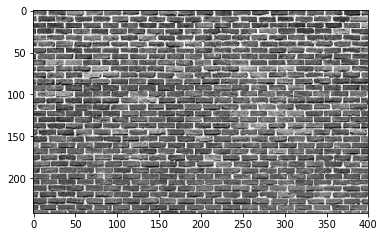

In [21]:
# Your code:
R = brick[:,:,0]
G = brick[:,:,1]
B = brick[:,:,2]

grey = (0.2125 * R) + (0.7154 * G) + (0.0721 * B)

import matplotlib.cm as cm 
matplotlib.pyplot.imshow(grey, cmap = matplotlib.cm.Greys_r)
matplotlib.pyplot.show()


---
**C. Take a 2D Fast Fourier Transform of the gray-scale image.   **

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fft2.html

**Calculate the amplitude of the fft 2D array. You can use np.abs( ) calucalte the amplitude, which calculates the absolute values (amplitudes) of complex numbers. Plot the amplitude. To highlight the vairation in the amplitude, plot log10 of the amplitude.  ** 

[[11927480.7119       113625.23956668    98605.75003491 ...
     43714.58822536    98605.75003491   113625.23956668]
 [  174918.67641791    75283.25360787    14869.81092534 ...
     41765.70905671    53648.46411425    77636.59757467]
 [   96665.53420223    59392.575147      34817.73154492 ...
     31684.95719374    41437.52637355    66179.80029883]
 ...
 [   41972.83932508    56116.16314435    22017.68204951 ...
     57603.57723083    50379.22078786    21427.45881863]
 [   96665.53420223    66179.80029883    41437.52637355 ...
     30493.1040402     34817.73154492    59392.575147  ]
 [  174918.67641791    77636.59757467    53648.46411425 ...
     84911.51725077    14869.81092534    75283.25360787]]


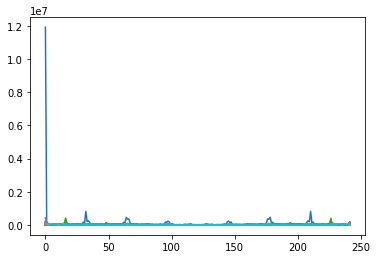

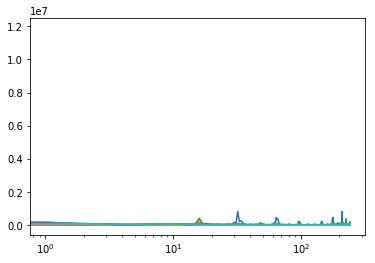

In [28]:
# Your code:
import numpy as np

F = np.fft.fft2(grey)

psd2D = np.abs(F)
print (psd2D)

plt.figure()
plt.plot(psd2D)


plt.figure()
plt.plot(psd2D)
plt.xscale("log")

---
**D. Your plot of log10 of amplitude should look different from the one in the video. You may notice that the amplitdue in the center of the plot is low, while some spots appearing near the edges of the 2D domain. This is because the fft2 function calculates the Fourtier transformation in the period from 0 to 2 $\pi$. For plots in the k space, we need to use transformation calculated in the period from $-\pi$ to $\pi$. Such that, the origin in the k space is at the center of the plot.**

** To do this, we need to move around the result from fft2( ) as the following. Swap the upper left quarter and the lower right. See regions A and D are swapped. Also, C and B will need to be swapped as illustrated in the figure below. **

<img src="FFT_2D_1.png" alt = "drawing" width=600 align="center"/>


**Plot the amplitude after shifting their position. **

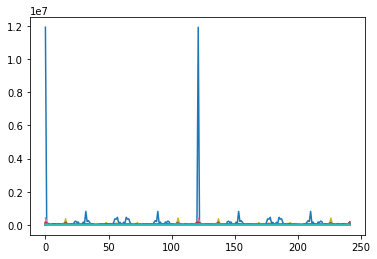

In [44]:
# Your code:
'''
F2 = np.fft.fftshift(F)

psd2D = np.abs(F2)
print (psd2D)

plt.figure()
plt.plot(psd2D)
'''
psd2D.shape
#print (psd2D)

A = psd2D[0:121,0:200]
B = psd2D[121:,0:200]
C = psd2D[0:121,200:]
D = psd2D[121:, 200:]

tempA = A
tempD = D

A = tempD
D = tempA

tempB = B
tempC = C

B = tempC
C = tempB

psd2D[0:121,0:200] = A
psd2D[121:,0:200] = B
psd2D[0:121,200:] = C
psd2D[121:,200:] = D

plt.figure()
plt.plot(psd2D)

---
**E. Here, let's compare our result to that from Python built-in function of fftshift. Use the function np.fft.fftshift( ) to the shift. Plot the result and compare it to the one obtained in the cell above. **

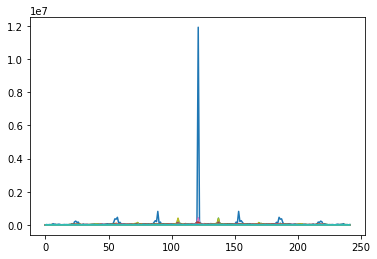

In [33]:
# your code:

F2 = np.fft.fftshift(F)

psd2D = np.abs(F2)
#print (psd2D)

plt.figure()
plt.plot(psd2D)


---
** Question 2: Note the regular pattern in the frequency space.  Where does the regular spots come from? **

**Your answer: ** from noise


---
### Congratulations, you're done with the pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181024, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!